# Bio723P Coding for Scientists Final Assignment

This assignment counts towards 100% of the marks for this module.

## Student name and number

Enter your full name and student number here: Ishack M Mougamadou Student ID: 150346599 

## Deadline and submission

Complete this notebook with your code and submit it as a `.zip` file containing this notebook and all the relevant .pdb files through the QMPlus page by the appropriate deadline:
* full time students: ** Friday Nov 2nd, 24:00 midnight**
* part-time students: ** Friday Nov 16th, 24:00 midnight**

**SUBMISSION CHECKLIST**
* Notebook is written in Python 2.7 and can be opened and run on the lab machines.
* Notebook runs correctly in a sequence from the first cell to the last with a fresh kernel, when all .pdb files (see below) are found in the same directory.
* Notebook includes all the required output and commented code.
* Notebook includes the full name of the author and student number.
* Zip file for submission includes the notebook and all the `.pdb` files you used.

Please refrain from editing the text of the assignment. Feel free to insert text or code cells anywhere, but please clean up rough work that you do not wish to be marked.

## Marking criteria

Your work will be marked based on:
* completeness and correctness: 60%
* quality of the algorithmic solutions (including appropriate use of data and control structures, use of functions, etc.): 30%
* coding style (comments, variable names, readability of code): 10%

Notes:
* Your code should be able to process any PDB file and may be tested and marked on different files than those you submit. 
* In particular your code should handle PDB files with multiple chains. However, it is assumed that each file only contains one model (see Introduction).
* Questions are listed in a sequence that makes it easy to answer them. Use this as a guide, but try to avoid code duplication - you will get marks for a question even if the code that does most of the work appears before it.
* Question dependencies: Questions 1, 2 and 3 are roughly independent of each other. Question 4 depends on Question 3. Question 5 depends on Question 4, and Question 6 on all those before it. You can attempt Question 6 based on data from one sequence only, and you will earn marks for correct code; however, your results will be unreliable. Question 7 can be attempted separately with the results of Questions 4, 5 and 6.


## Use of libraries

You are free to use any publicly available library; however, this assignment is designed to be feasible using only the functions in the [Python standard library](https://docs.python.org/2/library/index.html). As an exception, you will need ```numpy``` and ```matplotlib``` to plot the barchart graphs for the final question. These are installed on the lab machines.

## Introduction

In this assignment, you will parse PDB data files containing protein structural information in order to investigate the frequency and composition of the two main elements of secondary structure, namely [helices](https://en.wikipedia.org/wiki/Alpha_helix) and [beta sheets](https://en.wikipedia.org/wiki/Beta_sheet). In general, we will consider that residues are either part of a helix, or part of a sheet, or "irregular" (other secondary structure or no structure).

Begin by downloading a PDB file from the [RCSB website](https://www.rcsb.org/). Carefully read the relevant sections of the [PDB documentation](http://www.wwpdb.org/documentation/file-format-content/format33/v3.3.html) (especially the HELIX, SHEET, and ATOM tags) and check them against your chosen PDB file using an editor. Keep in mind that a PDB file can include multiple [chains](https://en.wikipedia.org/wiki/Protein_complex). A PDB file can also include multiple MODELs, but for the purpose of this exercise you should only consider files with a single model, i.e. files that do not contain MODEL/ENDMDL tags.

## Question 1: Parsing helices [10 marks]

Parse the PDB file of your choice to determine the number of helices in the protein. Print out
* the helixID and length of each helix
* the average length of a helix.

In [21]:
# your code here
PDB =open("5o5z.pdb", "r") # open the file
#print ("helixID"+'\t'+"length_of_helix"+'\n') # print the two headers 
total=0.0 #counter for the sum of all of the helix length 
no=0  # counter for how many HELIX lines in total

for x in PDB:
   col=x.split() # split the columns
   if "HELIX"==col[0]:# find the HELIX section in the first section  
      #print col[2],"         ",col[-1] # print the helixID column and the residue length column
      total=total+int(col[-1]) # sum of all the helix length 
      no=no+1 # number of helix IDs
      
result="The average length of a helix =",total/no # the total sum divided by the number of helixID)s
result

      
    



('The average length of a helix =', 11.063829787234043)

## Question 2: Parsing sheets [15 marks]

Determine the number of sheets. Keep in mind that a sheet has multiple strands, and that according to the documentation the same strand can be listed multiple times (the Python [set](https://docs.python.org/2/library/stdtypes.html#set) type or the `in` operator for lists may help deal with sequence numbers that are listed more than once).

For each sheet, print out:
* sheetID, number of strands and total number of residues

Further, compute:
* the average number of strands in a sheet
* the average number of residues in a sheet

In [25]:
# your code here
PDB =open("5o5z.pdb", "r") #open the file
sheets={} 
for x in PDB:
    
   if "SHEET"==x[0:5]: # look for the SHEET section
    idn=x[12:14] # the SHEET ID column
    if idn not in sheets: # if idn not in sheets, move to the following columns 
        aa=int(x[33:37])-int(x[22:26])+1 # the terminal residue - initial ID +1
        sheets[idn]=[int(x[14:17].strip()),aa] # strip the space around the sheet ID column 
    else:
        
        sheets[idn][1]=sheets[idn][1]+int(x[33:37])-int(x[22:26])+1 # add the SHEETS ID with the residue length+1
#print "SheetID        Strand Number       Total Number of Residues"  
total_strand=0.0 # counter for total strands
total_res=0.0   # counter for total residues
n=0.0           # counter for total number of values
for x in sheets:
    total_res=total_res+sheets[x][1] # equation for the total number of residues
    total_strand=total_strand+sheets[x][0] # equation for the total number of strands
    n=n+1 # total number of values +1 
    
    #print x +"                     "+ str(sheets[x][0])+"               "+str(sheets[x][1])
    
    
r1= "average number of strands in sheets =",round(total_strand/n) # calculate and round the figure
r2= "average number of residues in sheets =",round(total_res/n) # calculate and round the figure
r1

('average number of strands in sheets =', 6)

## Question 3: Parsing Residues [15 marks]

Parse the ATOM entries in the PDB file and print:
* the number of polypeptide chains,
* the length of each chain,
* The overall percentage of residues that are in a helix, in a sheet and in neither ("irregular").


In [3]:
# your code here
PDB =open("5o5z.pdb", "r") # open the file
res_sheet=0.0 # residues in sheet counter
res_helix=0.0 # residues in helix counter
poly_pep={} # the number of polypeptide chains
for x in PDB:
    if "SHEET"==x[0:5]: # find the SHEET section
      res_sheet=res_sheet+int(x[33:37])-int(x[22:26])+1 # terminal residue - initial residue+1
    if "HELIX"==x[0:5]: #  find the HELIX column
        res_helix=res_helix+int(x[71:76]) # the length of the helix
        
    if "ATOM"==x[0:4]: # find the ATOM section
        if x[21] not in poly_pep: # if residue not in polypeptide chain 
             poly_pep[x[21]]=[int(x[22:26])] # add the residue to the polypeptide chain 
        else:            
          if int(x[22:26]) not in poly_pep[x[21]]: # if not 
            
             poly_pep[x[21]].append(int(x[22:26])) # add to the number of polypeptide chain list
                
print  "the number of polypeptide chains =",len(poly_pep) # the number of polypeptide chains
total=0
for x in poly_pep:
    print "the length of chain",x,"is",len(poly_pep[x]) # the length of each chain
    total=total+len(poly_pep[x]) # the total length of the polypeptide chain
    
print  "The overall percentage of residues that are in a helix =",(res_helix/(total))*100 # 
print  "The overall percentage of residues that are in a sheet =",(res_sheet/(total))*100
print  "The overall percentage of residues that are in neither(irregular)=",((total-res_helix-res_sheet)/total)*100

the number of polypeptide chains = 2
the length of chain A is 454
the length of chain B is 449
The overall percentage of residues that are in a helix = 57.5858250277
The overall percentage of residues that are in a sheet = 18.9368770764
The overall percentage of residues that are in neither(irregular)= 23.4772978959


## Question 4: Residue distribution [15 marks]


Compute the frequency of each aminoacid in the sequence. Output this to a ``.csv`` file that looks as follows:

```
# Aminoacid,p(aa)
ALA,0.022
ARG,0.0534
ASN,0.032
ASP,0.104
...,...
```

In [4]:
PDB=open("5o5z.pdb","r")

aa=[] # create empty list for unique amino acids id and residue count 
for x in PDB:
    if "ATOM"==x[0:4]: # pick lines with atoms only
     a=x[17:20].strip()+"_"+x[21]+"_"+x[22:26].strip() # add the amino acid name chain and number
     if a not in aa: # add if not in list aa
          aa.append(a)
total=len(aa) #obtain total unique amino acid in pdb file
aa_count={} # create empty dictionary to store amino acid count
for x in aa:
    if x.split("_")[0] not in aa_count:  #3 take only aa name  eg ALA_A_3 --> ALA
        aa_count[x.split("_")[0]]=1      # ADD IF NOT  IN DICTIONARY
    else:
        aa_count[x.split("_")[0]]+=1     # if present add one to its old value
out=open("freq_aa_Question_4.csv","w")# create new empty file
out.write("#Aminoacid,p(aa)\n") #write file header
print "#Aminoacid,p(aa)"
for x in aa_count:
    line=x+","+str(float(aa_count[x])/total)+"\n"   # write residue frequency 
    print line.rstrip()
    out.write(line)  # write line to output file
out.close()
PDB.close()




#Aminoacid,p(aa)
GLN,0.0199335548173
ASP,0.0442967884828
SER,0.0420819490587
VAL,0.0797342192691
LYS,0.0564784053156
PRO,0.0354374307863
GLY,0.0730897009967
THR,0.0343300110742
PHE,0.0454042081949
ASN,0.0487264673311
HIS,0.0177187153931
MET,0.0166112956811
ILE,0.0797342192691
LEU,0.0996677740864
ARG,0.0642303433001
TRP,0.00885935769657
ALA,0.0797342192691
GLU,0.114064230343
TYR,0.0398671096346


## Question 5: Processing multiple proteins [10 marks]

Download at least 25 different PDB files. Enter their names in a list. Modify your code so that it processes all listed files one after the other. Your code should compute a residue distribution as in Question 4 aggregated over all sequences (the other outputs are not required at this stage). Output to a `.csv` file as above.

In [5]:
# please run Question 4 before running Question 5, as they are both linked.
#Thank you

# your code here
import os
PDB_files=os.listdir(".") # open all the PDB files
list_of_PDB_files=[] # create a empty list for the 25 PDB files
for names in PDB_files: 
    if names.endswith(".pdb"):
        list_of_PDB_files.append(names) # append all files that end with .pdb
aa=[] # create empty list for unique amino acid with codon id and aa no
for any_file in list_of_PDB_files:
    l=open(any_file,"r")
    for x in l:
        if "ATOM"==x[0:4]: # pick lines with atoms only
            a=x[17:20].strip()+"_"+x[21]+"_"+x[22:26].strip() # concatenate aa name chain and no
        if a not in aa: # add if not in list aa
            aa.append(a)
total=len(aa) #obtain total unique amino acid in pdb file
aa_count={} # create empty dictionary to store amino acid count
for x in aa:
    if x.split("_")[0] not in aa_count:  #3 take only aa name  eg ALA_A_3 --> ALA
        aa_count[x.split("_")[0]]=1      # ADD IF NOT  IN DICTIONARY
    else:
        aa_count[x.split("_")[0]]+=1     # if present add one to its old value
out=open("aggregate_residue_freq_Question_5.csv","w")# create new empty file
out.write("#Aminoacid,p(aa)total\n") #write file header
print "#Aminoacid,p(aa)total"
for x in aa_count:
    line=x+","+str(float(aa_count[x])/total)+"\n"   # write aggregate residue freq
    print line.rstrip()
    out.write(line)  # write line to output file
out.close()




#Aminoacid,p(aa)total
CYS,0.0157576901302
GLN,0.0415172674089
ILE,0.0541611624835
SER,0.0586903189281
VAL,0.0685034912248
LYS,0.0553878090206
PRO,0.0509530100019
THR,0.0556708812984
PHE,0.0422721268164
GLU,0.0697301377618
HIS,0.0273636535195
GLY,0.0689752783544
ASP,0.0573693149651
LEU,0.0792602377807
ARG,0.0501981505945
TRP,0.01877712776
ALA,0.0786940932251
ASN,0.0423664842423
TYR,0.0393470466126
MET,0.0250047178713


## Question 6: Secondary structure propensities [25 marks]

Using aggregated data from all the PDB files, compute the residue frequency separately for helical segments of a sequence, sheets and "irregular" segments. We shall indicate these as p(aa|H), p(aa|S), p(aa|I). Output these alongside the global frequency p(aa) computed in Question 5 to a `.csv` file (see below). For each residue, also compute the following quantities: prop(H)=log (p(aa|H)/p(aa)), prop(S)=log (p(aa|S)/p(aa)), prop(I)=log(p(aa|I)/p(aa)). These are a rough measure of the "propensity" of each residue to be in each type of secondary structure. A positive propensity indicates that the aminoacid is more likely to be found in that secondary structure than in the sequence in general; negative propensities indicate the opposite. These values can be used for secondary structure prediction ([Chou-Fasman](https://en.wikipedia.org/wiki/Chou%E2%80%93Fasman_method) method).

Output to a `.csv` file as follows (numbers below are arbitrary):

```
# Aminoacid,p(aa),p(aa|H),p(aa|S),p(aa|I),prop(H),prop(S),prop(I)
ALA,0.022,0.028,0.020,0.025,0.241,-0.095,0.127
ARG,0.053,0.044,0.062,0.055,-0.186,0.156,0.037
ASN,0.032,...
ASP,0.104,...
...,...,..........
```

NOTE: Each of the first four columns should sum to 1. If you get a ZeroDivisionError or a ValueError problem caused by `log(0.0)` when computing the propensities, just add 1 to all aminoacid counts prior to computing the frequencies (see [Laplace smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)). 

In [6]:
helix={} # dictionary for helix count 
sheet={} # dictionary for helix count 
other={} # dictionary for other structures (for the irregular count) 

for file in ["5o5z.pdb","5vma.pdb","5ylx.pdb","5ym0.pdb","5ym3.pdb", # list of PDB files
              "5ym9.pdb","5ymv.pdb","5ymw.pdb",'5ymx.pdb','5yn2.pdb',
            '5yn7.pdb','5yna.pdb','5ync.pdb','5ynd.pdb','5yne.pdb']:

    PDB_files=open(file,"r") # open the PDB files
    
   
    all_aa=[] # list of all the amino acids
    aa=[]
    H=[] # list for the helix
    S=[] # list for the sheet
    h_len=0 # counter for the helix length 
    for x in PDB_files:

        if "HELIX"==x[0:5]: # find the helix section
            start=x[21:25].strip() # the initial residue and strip the white spaces 
            stop=x[33:37].strip() # the terminal residue and strip the white spaces 
            H.append(x[19]+"_"+start+"_"+stop)# the position of the residues in the Helix
            h_len+=int(x[71:76])# count the length of the residue  

        if "SHEET"==x[0:5]: # find the SHEET section
            start=x[22:26].strip() # the initial residue and strip white spaces
            stop=x[33:37].strip() # the terminal residue and strip white spaces
            S.append(x[21]+"_"+start+"_"+stop) #the position of the residues in the Sheet
        if "ATOM"==x[0:4]: # pick lines with atoms only
         a=x[17:20].strip()+"_"+x[21]+"_"+x[22:26].strip() # add aa name chain and number
         if a not in aa: # add if not in list aa
              aa.append(a)
         if x[17:20] not in all_aa: # if residue name not in all amino acids
              all_aa.append(x[17:20]) # add it to the list
    chain={} # dictionary for the chain ID 
    for x in aa: # the aa and the position in each file
        each=x.split("_") # split them
        if each[1] not in chain: # if aa not in chain  
             chain[each[1]]={int(each[2]):each[0]} # add it to the chain dictionary
        else:
             chain[each[1]][int(each[2])]=each[0] # if it is,leave it has it is  



    for x in H:
        a=x.split("_") # split the list 
        for v in range(int(a[1]),int(a[2])+1): # the range for the residues+1

            if chain[a[0]][v] not in helix: #  if chain not in helix 
                helix[chain[a[0]][v]]=1 # the helix count is 1
                if chain[a[0]][v]+"_"+a[0]+"_"+str(v) in aa: # if chain is in amino acid, add it
                 aa.remove(chain[a[0]][v]+"_"+a[0]+"_"+str(v)) 
            else:
                helix[chain[a[0]][v]]+=1 # if chain is in helix add 1
                if chain[a[0]][v]+"_"+a[0]+"_"+str(v) in aa: # add chain to aa
                 aa.remove(chain[a[0]][v]+"_"+a[0]+"_"+str(v)) 

    for x in S: # SHEETS
        a=x.split("_") # split the items in the list
        for v in range(int(a[1]),int(a[2])+1): # residue range
            if chain[a[0]][v] not in sheet: # if chain not in sheet
                sheet[chain[a[0]][v]]=1 # add it to the sheet
                if chain[a[0]][v]+"_"+a[0]+"_"+str(v) in aa: # add chain to the aa
                 aa.remove(chain[a[0]][v]+"_"+a[0]+"_"+str(v)) 
            else:
                sheet[chain[a[0]][v]]+=1 # if chain is in sheet add 1
                if chain[a[0]][v]+"_"+a[0]+"_"+str(v) in aa: # add to aa
                 aa.remove(chain[a[0]][v]+"_"+a[0]+"_"+str(v))


    for x in aa:
        a=x.split("_") # split the list 
        if chain[a[1]][int(a[2])] not in other: # if chain not irregular
                other[chain[a[1]][int(a[2])]]=1 # do not add to the other list 

        else:
                other[chain[a[1]][int(a[2])]]+=1 # if chain is irregular add 1 
total=0.0 # total residue count for all sections combined
count=[] # dictionary for the count
for x in [helix,sheet,other]:
    val=0.0 # counter for value for each
    for y in x:
        val+=x[y] #count the values for each
    count.append(val) # append to the value counter
    total+=val # get the total 
from math import log # for log operations
out=open("secondary_structure_Question_6.csv","w") # create a csv file
out.write("#Aminoacid,p(aa),p(aa/H),p(aa/S),p(aa/I),prop(H),prop(S),prop(I)\n") # write the header
print "#Aminoacid,p(aa),p(aa/H),p(aa/S),p(aa/I),prop(H),prop(S),prop(I)"
for x in all_aa: # for all the amino acids
    paa=(helix[x]+sheet[x]+other[x])/total # add all residues divided by the total number
    paa_h=helix[x]/count[0] # counter for the number of residue in helix
    paa_s=sheet[x]/count[1] # counter for the number of residue in sheet
    paa_i=other[x]/count[2] # counter for the number of residue in irregular
    prop_h=log(paa_h/paa) # calculate the prop(H)
    prop_s=log(paa_s/paa) # calculate the prop(S)
    prop_i=log(paa_i/paa) # calculate the prop(I)
    print ','.join([str(x), str(paa),str(paa_h),str(paa_s),str(paa_i),str(prop_h),str(prop_s),str(prop_i)])
    out.write(','.join([str(x), str(paa),str(paa_h),str(paa_s),str(paa_i),str(prop_h),str(prop_s),str(prop_i)])+"\n")
out.close() # write to file and close the file 




#Aminoacid,p(aa),p(aa/H),p(aa/S),p(aa/I),prop(H),prop(S),prop(I)
PRO,0.0466278101582,0.0225469728601,0.0270964061609,0.0840284842319,-0.726596331936,-0.542796042536,0.588958691725
GLN,0.0467791991522,0.0494780793319,0.0462065031375,0.0445574771109,0.0560910881508,-0.0123180928281,-0.0486586653441
ASP,0.0703958822194,0.0705636743215,0.0359383913292,0.0948118006104,0.00238071380911,-0.672328649799,0.297759110275
VAL,0.075013246537,0.055114822547,0.134911580148,0.0516785350966,-0.30824602671,0.586954883559,-0.372622205014
ARG,0.0464007266672,0.0617954070981,0.0444951511694,0.0327568667345,0.286513922861,-0.0419348992895,-0.348202508655
LEU,0.0782681099084,0.104384133612,0.0827153451226,0.0496439471007,0.287937447827,0.0552648973093,-0.455263767478
ALA,0.0878056165317,0.104592901879,0.0681688533942,0.0854526958291,0.174950221458,-0.253137702772,-0.0271625105259
GLY,0.0745590795549,0.0582463465553,0.0419281232173,0.113733468973,-0.246910454877,-0.575635024996,0.42226589428
GLU,0.05790629021

## Question 7: Plots [10 marks]

Produce barchart plots of the residue distribution in Question 4 (or Question 5) and the propensities in Question 6, with the aminoacids listed on the X axis. You have two options:
* produce the graphs in a spreadsheet software such as OpenOffice (`soffice` on the Lab machines) starting from the `.csv` files, save them as images and display them in the notebook **[5 marks only]**
* use the `matplotlib` library to generate the barcharts programmatically **[10 marks]**

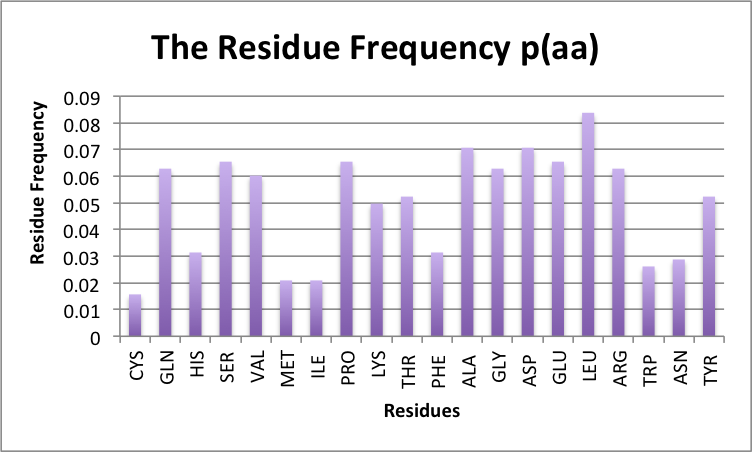

In [7]:
# your code here

# Residue Distribution Plot for Question 4: PDB file name:5ylx.pdb

from IPython.display import Image
Image(filename="Residue_freq_Question4.png", width=500, height=500) 





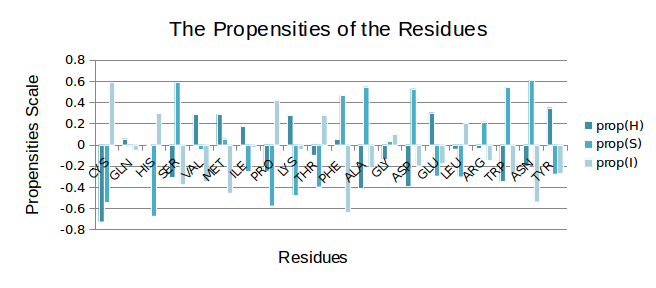

In [8]:
# Propensities plot for Question 6:

from IPython.display import Image
Image(filename="Propensities_Question6.png", width=500, height=500) 

## Examiners

Dr Fabrizio Smeraldi *(f.smeraldi@qmul.ac.uk)*; Prof Conrad Bessant *(c.bessant@qmul.ac.uk)*